In [1]:
import os, sys, glob
from datetime import datetime
sys.path.insert(0,'/Users/wujung/Desktop/mi-instrument-master/')

from mi.instrument.kut.ek60.ooicore.zplsc_b import *
from concat_raw_output import *

In [2]:
power2Sv?

In [3]:
data_path = '/Users/wujung/ooi_data_80m/'
fname_form = 'OOI-D*.raw'  # index all files in 2015
fname_all = glob.glob(os.path.join(data_path,fname_form))
date_wanted = ['20150901']#,'20150903']

idx_date = get_date_idx(date_wanted,fname_all)

In [6]:
particle_data, data_times, power_data_dict, freq, bin_size, config_header, config_transducer = \
        parse_echogram_file(fname_all[idx_date[0]])
cal_params = get_cal_params(power_data_dict,particle_data,config_header,config_transducer)
power2Sv(power_data_dict,cal_params)  # convert from power to Sv
Sv_mtx = get_Sv_mtx(power_data_dict,freq)
sz = Sv_mtx.shape

2017-02-02 17:18:09,076 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Begin processing echogram data: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'
2017-02-02 17:18:12,369 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed processing data. Generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'
2017-02-02 17:18:18,832 INFO     mi.instrument.kut.ek60.ooicore.zplsc_b Completed generating echogram: '/Users/wujung/ooi_data_80m/OOI-D20150901-T000000.raw'


In [7]:
import matplotlib.pylab as plt
from modest_image import imshow
%matplotlib inline

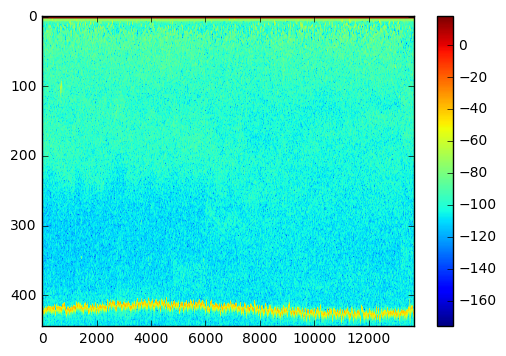

In [9]:
n=0
imgplot=plt.imshow(power_data_dict[n+1][::-1],aspect="auto")
plt.colorbar()

In [12]:
Sv=power2Sv(power_data_dict,cal_params)

In [15]:
def get_data_mtx(data_dict,frequencies):
    fval = frequencies.values()
    fidx = sorted(range(len(fval)), key=lambda k: fval[k])   # get key sequence for low to high freq
    fidx = [x+1 for x in fidx]
    return np.array((data_dict[fidx[0]],\
                     data_dict[fidx[1]],\
                     data_dict[fidx[2]]))  # organize all values into matrix

In [16]:
Sv_mtx = get_data_mtx(Sv,freq)

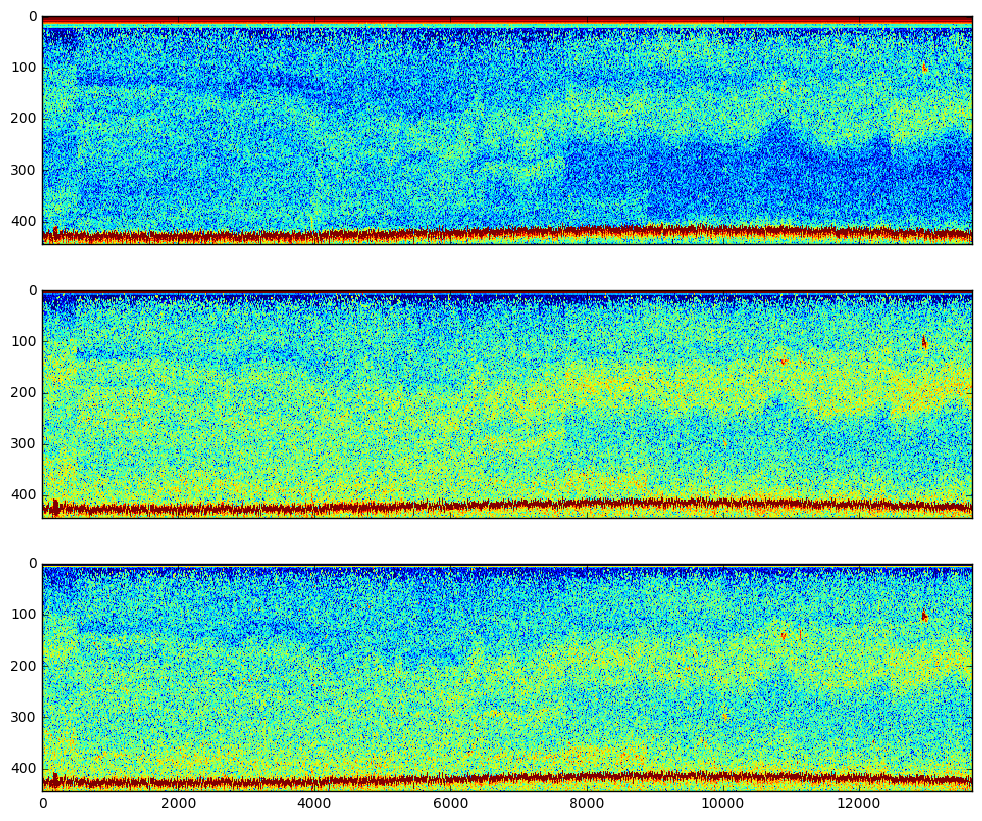

In [20]:
fig, ax = plt.subplots(3, sharex=True)
for ff in range(Sv_mtx.shape[0]):
    im = imshow(ax[ff],Sv_mtx[ff,:,-1:0:-1], interpolation='none', aspect='auto', cmap='jet',vmax=-34,vmin=-80)
fig.set_figwidth(12)
fig.set_figheight(10)